In [3]:
## Analyse recall rate csv

import pandas as pd

csv_path = '/Users/ayush/Desktop/remapped_eicher_bams/recall_rate.csv'
df = pd.read_csv(csv_path)

## Group over the three simulated genomes
df = df.groupby(['Line', 'Strategy', 'Genotype', 'Simulated_Mutation', 'Focal_Variant'], as_index=False).mean().round(1)
df.drop(columns='Simulation_Index', inplace=True)
df

,Line,Strategy,Genotype,Simulated_Mutation,Focal_Variant,100-bp,1000-bp,10000-bp,100000-bp
0,CB_MA517,Strategy1,N2,DEL,INS,70.3,45.7,4.0,0.0
1,CB_MA517,Strategy1,N2,INS,DEL,78.3,73.0,63.3,0.0
2,CB_MA517,Strategy1,N2,INV,INV,0.0,42.0,20.3,24.7
3,CB_MA517,Strategy1,N2,WS270,DEL,2.0,1.0,0.0,0.0
4,CB_MA517,Strategy1,N2,WS270,INS,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
127,QX1211,Strategy2,QX1211,INS,DEL,109.3,84.7,81.0,0.0
128,QX1211,Strategy2,QX1211,INV,INV,0.0,43.3,10.0,25.7
129,QX1211,Strategy2,QX1211,WS270,DEL,42.0,3.0,0.0,0.0
130,QX1211,Strategy2,QX1211,WS270,INS,24.0,1.0,0.0,0.0


In [4]:
# Filter df to remove all data points with strategy2
# Assuming df is your DataFrame and 'strategy' is the column to filter
df= df[df['Strategy'] != 'Strategy2']

# Display the filtered DataFrame
df

,Line,Strategy,Genotype,Simulated_Mutation,Focal_Variant,100-bp,1000-bp,10000-bp,100000-bp
0,CB_MA517,Strategy1,N2,DEL,INS,70.3,45.7,4.0,0.0
1,CB_MA517,Strategy1,N2,INS,DEL,78.3,73.0,63.3,0.0
2,CB_MA517,Strategy1,N2,INV,INV,0.0,42.0,20.3,24.7
3,CB_MA517,Strategy1,N2,WS270,DEL,2.0,1.0,0.0,0.0
4,CB_MA517,Strategy1,N2,WS270,INS,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
121,QX1211,Strategy1,QX1211,INS,DEL,110.0,86.0,82.0,0.0
122,QX1211,Strategy1,QX1211,INV,INV,0.0,30.3,6.0,17.7
123,QX1211,Strategy1,QX1211,WS270,DEL,42.0,3.0,0.0,0.0
124,QX1211,Strategy1,QX1211,WS270,INS,23.0,1.0,0.0,0.0


In [5]:
# Create two DataFrames: one for baseline and one for real data points
baseline_df = df[df['Simulated_Mutation'] == 'WS270'].copy()
real_data_df = df[df['Simulated_Mutation'] != 'WS270'].copy()

# Drop the 'Simulated_Mutation' column from both DataFrames
baseline_df.drop(columns='Simulated_Mutation', inplace=True)
real_data_df.drop(columns='Simulated_Mutation', inplace=True)

# Merge the real data DataFrame with the baseline DataFrame on common columns
merged_diff_df = real_data_df.merge(baseline_df, on=['Line', 'Strategy', 'Genotype', 'Focal_Variant'], suffixes=('_baseline_plus_simulated', '_baseline'))

# Subtract the values of the specified columns between the real data and baseline DataFrames
for col in ['100-bp', '1000-bp', '10000-bp', '100000-bp']:
    difference_from_baseline = merged_diff_df[f'{col}_baseline_plus_simulated'] - merged_diff_df[f'{col}_baseline']
    merged_diff_df[col] = difference_from_baseline.clip(lower=0)

# Drop the unnecessary columns
merged_diff_df.drop(columns=['100-bp_baseline_plus_simulated', '1000-bp_baseline_plus_simulated', '10000-bp_baseline_plus_simulated', '100000-bp_baseline_plus_simulated',
                        '100-bp_baseline', '1000-bp_baseline', '10000-bp_baseline', '100000-bp_baseline'], inplace=True)

# Display the resulting DataFrame
print(merged_diff_df)


        Line   Strategy Genotype Focal_Variant  100-bp  1000-bp  10000-bp   
0   CB_MA517  Strategy1       N2           INS    69.3     44.7       4.0  \
1   CB_MA517  Strategy1       N2           DEL    76.3     72.0      63.3   
2   CB_MA517  Strategy1       N2           INV     0.0     41.0      20.3   
3   CB_MA530  Strategy1       N2           INS    96.7     80.3      30.0   
4   CB_MA530  Strategy1       N2           DEL    97.0     96.7      97.3   
5   CB_MA530  Strategy1       N2           INV     0.0     54.7      14.7   
6   CB_MA563  Strategy1       N2           INS    92.7     72.3      19.7   
7   CB_MA563  Strategy1       N2           DEL    96.7     97.0      95.3   
8   CB_MA563  Strategy1       N2           INV     0.0     50.7      14.3   
9   CB_MA566  Strategy1       N2           INS    90.0     74.0      25.7   
10  CB_MA566  Strategy1       N2           DEL    95.0     97.0      95.7   
11  CB_MA566  Strategy1       N2           INV     0.0     48.0      13.7   

In [6]:
# strategy = 'Strategy1'

# for line in ['CB_MA517', 'CB_MA530', 'CB_MA563', 'CB_MA566', 'PB_MA445', 'PB_MA459', 'N2', 'PB306', 'Hawaii', 'JU1088', 'QX1211']:
#     for variant in ['DEL', 'INS', 'INV']:
#         filtered_df = df[(df['Line'] == line) & (df['Strategy'] == 'Strategy1') & (df['Focal_Variant'] == variant)]
        
#         print(f"{line},{variant},{filtered_df['100-bp'].mean()}, {filtered_df['1000-bp'].mean()}, {filtered_df['10000-bp'].mean()}, {filtered_df['100000-bp'].mean()}")
#     print("_________________________________________________________________________________")

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define ma_lines and others_lines
ma_lines = ['CB_MA517', 'CB_MA530', 'CB_MA563', 'CB_MA566', 'PB_MA445', 'PB_MA459']
others_lines = ['N2', 'PB306', 'Hawaii', 'JU1088', 'QX1211']
#others_lines = ['PB306', 'Hawaii', 'JU1088', 'QX1211']
# Filtered data for lines starting with 'MA' and others
filtered_df_ma = merged_diff_df[(merged_diff_df['Line'].isin(ma_lines)) & (merged_diff_df['Strategy'] == 'Strategy1')]

# Filtered data for others lines
filtered_df_others = merged_diff_df[(merged_diff_df['Line'].isin(others_lines)) & (merged_diff_df['Strategy'] == 'Strategy1')]


for variant in ['DEL', 'INS', 'INV']:
    for variant_size in ['100-bp', '1000-bp', '10000-bp', '100000-bp']:
        filtered_df_ma_type = filtered_df_ma[(filtered_df_ma['Focal_Variant'] == variant)]
        filtered_df_others_type = filtered_df_others[(filtered_df_others['Focal_Variant'] == variant)]

        # Combine the two filtered DataFrames
        combined_df = pd.concat([filtered_df_ma, filtered_df_others])

        # Add a new column 'type'
        combined_df['type'] = 'MA'
        combined_df.loc[combined_df['Line'].isin(others_lines), 'type'] = 'Wild Isolates'


        # sns.boxplot(x=combined_df['type'], y=combined_df[variant_size])
        # print(variant, variant_size)
        # plt.show()

        # sns.scatterplot(x=filtered_df_others_type['Line'], y=combined_df[variant_size])
        # plt.show()


# # Create subplots
# fig, axs = plt.subplots(len(ma_lines) + len(others_lines), 1, figsize=(10, 10), sharex=True)

# # Plot for 'MA' lines and others for deletions with length 100-bp
# for i, line_type in enumerate([ma_lines, others_lines]):
#     for j, line in enumerate(line_type):
#         filtered_df = deletion_data[(deletion_data['Line'] == line) & (deletion_data['Strategy'] == 'Strategy1')]
#         sns.boxplot(x=filtered_df['Line'], y=filtered_df['100-bp'], ax=axs[i * len(ma_lines) + j])
#         axs[i * len(ma_lines) + j].set_title(line)
#         axs[i * len(ma_lines) + j].set_ylabel('Mean')
#         axs[i * len(ma_lines) + j].set_xlabel('')
#         axs[i * len(ma_lines) + j].set_xticklabels([])

# # Set x-axis label for the last subplot
# axs[-1].set_xlabel('Line')

# # Adjust layout
# plt.tight_layout()

# # Show the plot
# plt.show()





# # Set tick labels after plotting the box plot
# for ax in axs:
#     ax.set_xticklabels(['100-bp', '1000-bp', '10000-bp', '100000-bp'])

# # Plot scatter plot for specific lines
# plt.figure(figsize=(10, 8))
# for line in ['N2', 'PB306', 'Hawaii', 'JU1088', 'QX1211']:
#     for variant in ['DEL', 'INS', 'INV']:
#         filtered_df = df[(df['Line'] == line) & (df['Strategy'] == 'Strategy1') & (df['Focal_Variant'] == variant)]
#         plt.scatter(filtered_df.index, filtered_df['100-bp'].mean(), label=f"{line} - {variant}")

# plt.xlabel('Index')
# plt.ylabel('Mean')
# plt.legend()
# plt.title('Comparison of Specific Lines for All Variant Types')
# plt.show()


In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
merged_diff_df




,Line,Strategy,Genotype,Focal_Variant,100-bp,1000-bp,10000-bp,100000-bp
0,CB_MA517,Strategy1,N2,INS,69.3,44.7,4.0,0.0
1,CB_MA517,Strategy1,N2,DEL,76.3,72.0,63.3,0.0
2,CB_MA517,Strategy1,N2,INV,0.0,41.0,20.3,24.7
3,CB_MA530,Strategy1,N2,INS,96.7,80.3,30.0,0.0
4,CB_MA530,Strategy1,N2,DEL,97.0,96.7,97.3,0.0
5,CB_MA530,Strategy1,N2,INV,0.0,54.7,14.7,27.0
6,CB_MA563,Strategy1,N2,INS,92.7,72.3,19.7,0.0
7,CB_MA563,Strategy1,N2,DEL,96.7,97.0,95.3,0.0
8,CB_MA563,Strategy1,N2,INV,0.0,50.7,14.3,26.7
9,CB_MA566,Strategy1,N2,INS,90.0,74.0,25.7,0.0


In [9]:
merged_diff_df_summary = merged_diff_df.groupby(['Line', 'Strategy'])[['100-bp', '1000-bp', '10000-bp']].mean().reset_index()
merged_diff_df_summary[merged_diff_df_summary['Strategy'] == 'Strategy1']


,Line,Strategy,100-bp,1000-bp,10000-bp
0,CB_MA517,Strategy1,48.533333,52.566667,29.200000
1,CB_MA530,Strategy1,64.566667,77.233333,47.333333
2,CB_MA563,Strategy1,63.133333,73.333333,43.100000
3,CB_MA566,Strategy1,61.666667,73.000000,45.033333
4,Hawaii,Strategy1,56.000000,64.566667,36.666667
5,JU1088,Strategy1,60.000000,68.900000,39.433333
6,N2,Strategy1,62.333333,75.800000,53.633333
7,PB306,Strategy1,59.000000,69.433333,43.000000
8,PB_MA445,Strategy1,56.733333,68.066667,41.733333
9,PB_MA459,Strategy1,55.233333,62.466667,42.200000


In [10]:
# Melt the DataFrame to convert it into long format
melted_df = pd.melt(filtered_df_others, id_vars=['Line', 'Strategy', 'Genotype', 'Focal_Variant'], var_name='Variant Size', value_name='number_of_recalled_mutations')

# IF we want all lines
# melted_df = pd.melt(merged_diff_df, id_vars=['Line', 'Strategy', 'Genotype', 'Focal_Variant'], var_name='Variant Size', value_name='number_of_recalled_mutations')


# # Convert the 'Size' column values to integers
melted_df['Size'] = melted_df['Variant Size'].apply(lambda x: int(x.split('-')[0]))

melted_df

,Line,Strategy,Genotype,Focal_Variant,Variant Size,number_of_recalled_mutations,Size
0,Hawaii,Strategy1,Hawaii,INS,100-bp,85.7,100
1,Hawaii,Strategy1,Hawaii,DEL,100-bp,82.3,100
2,Hawaii,Strategy1,Hawaii,INV,100-bp,0.0,100
3,JU1088,Strategy1,JU1088,INS,100-bp,89.7,100
4,JU1088,Strategy1,JU1088,DEL,100-bp,90.3,100
5,JU1088,Strategy1,JU1088,INV,100-bp,0.0,100
6,N2,Strategy1,N2,INS,100-bp,91.3,100
7,N2,Strategy1,N2,DEL,100-bp,95.7,100
8,N2,Strategy1,N2,INV,100-bp,0.0,100
9,PB306,Strategy1,PB306,INS,100-bp,89.0,100


In [11]:
# Summarize melted_df so taht for each genotype, say PB306, I have the average number_of_recalled_mutation average over all variant types, but separated by size
melted_df_summary = melted_df.groupby(['Line', 'Variant Size'])['number_of_recalled_mutations'].mean().reset_index()
melted_df_summary[melted_df_summary['Line'] == 'JU1088']


,Line,Variant Size,number_of_recalled_mutations
4,JU1088,100-bp,60.000000
5,JU1088,1000-bp,68.900000
6,JU1088,10000-bp,39.433333
7,JU1088,100000-bp,8.566667


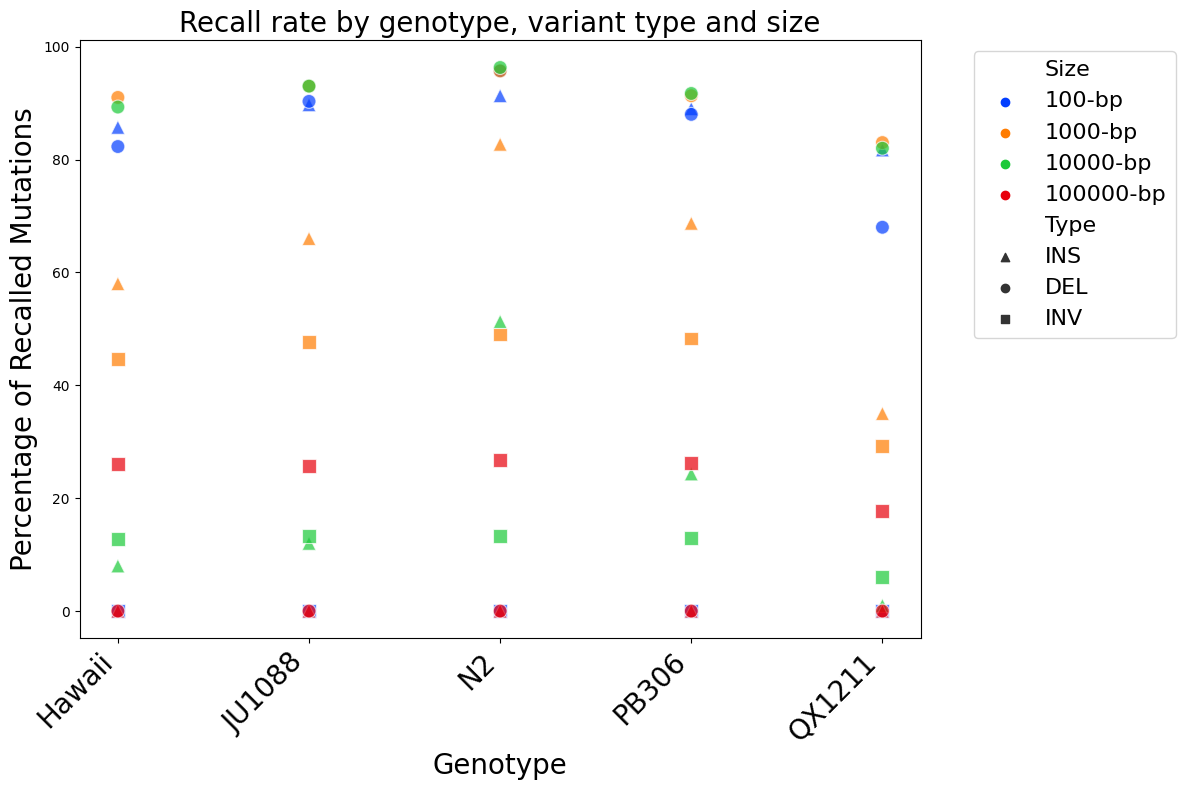

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define marker styles for each variant type
marker_styles = {'DEL': 'o', 'INS': '^', 'INV': 's'}

# Get unique sizes
unique_sizes = melted_df['Size'].unique()

# Extract the colors used in the scatter plot
color_palette = sns.color_palette('bright', len(unique_sizes))

# Create scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=melted_df, x='Line', y='number_of_recalled_mutations', hue='Variant Size', style='Focal_Variant',
                palette='bright', markers=marker_styles, alpha = 0.7, s=100)

# Set sizes of the data points to be the square root of 'Size'
# plt.gca().collections[0].set_sizes((melted_df['Size']*10)**0.4)
# Set labels and title
plt.xlabel('Genotype', fontsize = 20)
plt.ylabel('Percentage of Recalled Mutations', fontsize = 20)
plt.title('Recall rate by genotype, variant type and size', fontsize = 20)

# start_legend = [plt.scatter([], [], [0], label=f'Variant Sizes')]

# # Create custom legend handles with correct sizes and colors
# color_legend_handles = []
# for size, color in zip(unique_sizes, color_palette):
#     color_legend_handles.append(plt.scatter([], [], s=np.sqrt(size), color=color, label=str(size)))



# gap_legend = [plt.scatter([], [], [0], label='Variant Types')]
# gap_legend[0].set_label('Variant Types')
# plt.gca().get_legend().get_title().set_fontweight('bold')

# # Create custom legend handles for markers
# marker_legend_handles = []
# for marker_variant in marker_styles:
#     marker = marker_styles[marker_variant]
#     marker_legend_handles.append(plt.scatter([], [], s=100, marker=marker, color='black', label=f'{marker_variant}'))

    

# # # Move legend outside the plot
# # plt.legend(title='Legend', handles=color_legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left')
# # plt.legend(title='Markers', handles=marker_legend_handles, bbox_to_anchor=(1.05, 0.5), loc='upper left')

# Change the legend title and increase font sizes
handles, labels = scatter.get_legend_handles_labels()
# Modify the label for 'Variant Size'
new_labels = ['Size' if label == 'Variant Size' else 'Type' if label == 'Focal_Variant' else label for label in labels]

scatter.legend(handles, new_labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16, title='')

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 20)

# plt.legend(handles=start_legend + color_legend_handles + gap_legend + marker_legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.xticks(rotation=45, ha='right', fontsize = 20)
plt.savefig("false_negative_by_genotype.pdf", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()






In [169]:
!pip3 install ggplot2

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement ggplot2 (from versions: none)
ERROR: No matching distribution found for ggplot2

[notice] A new release of pip is available: 23.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


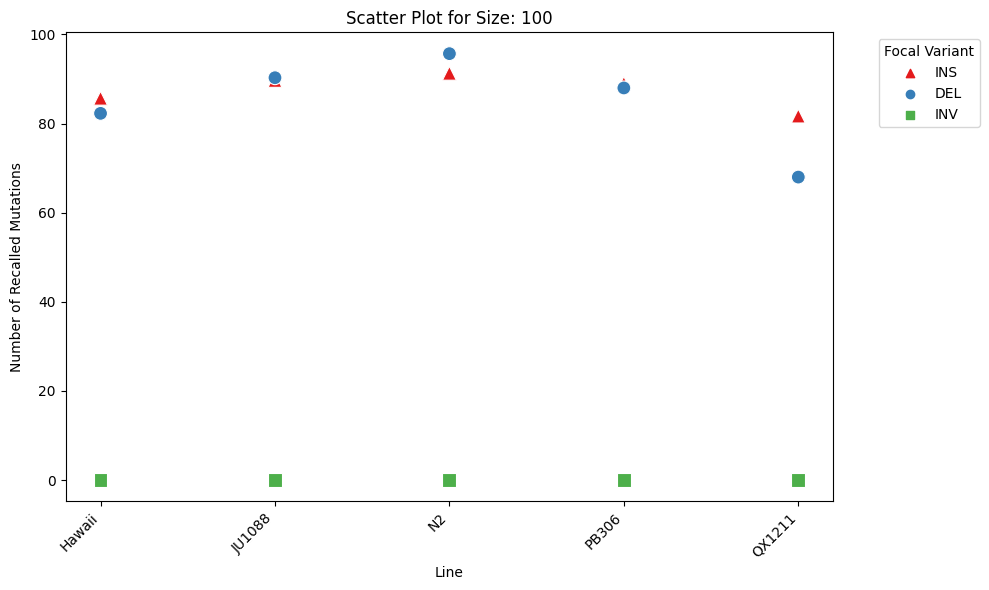

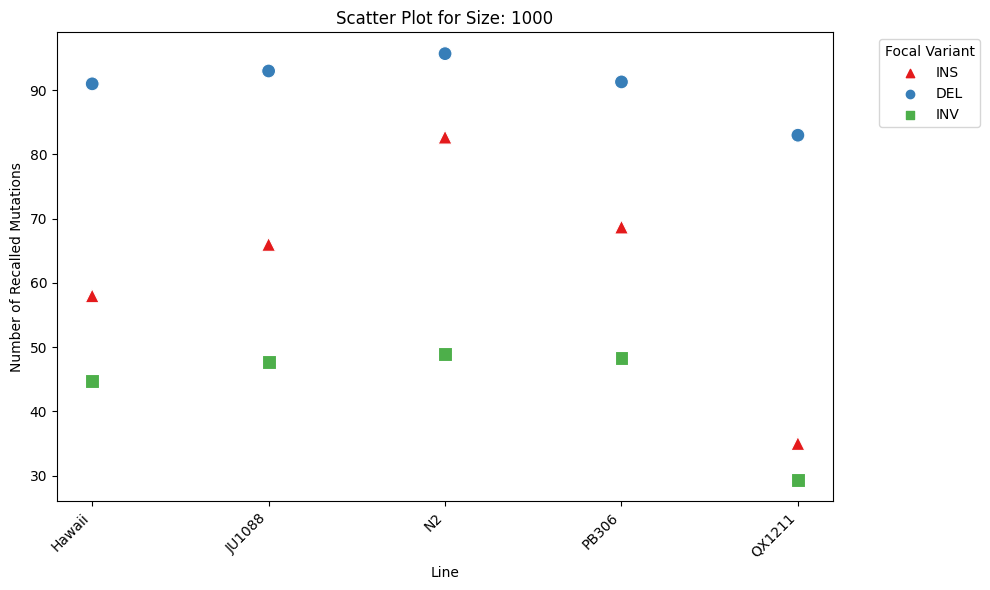

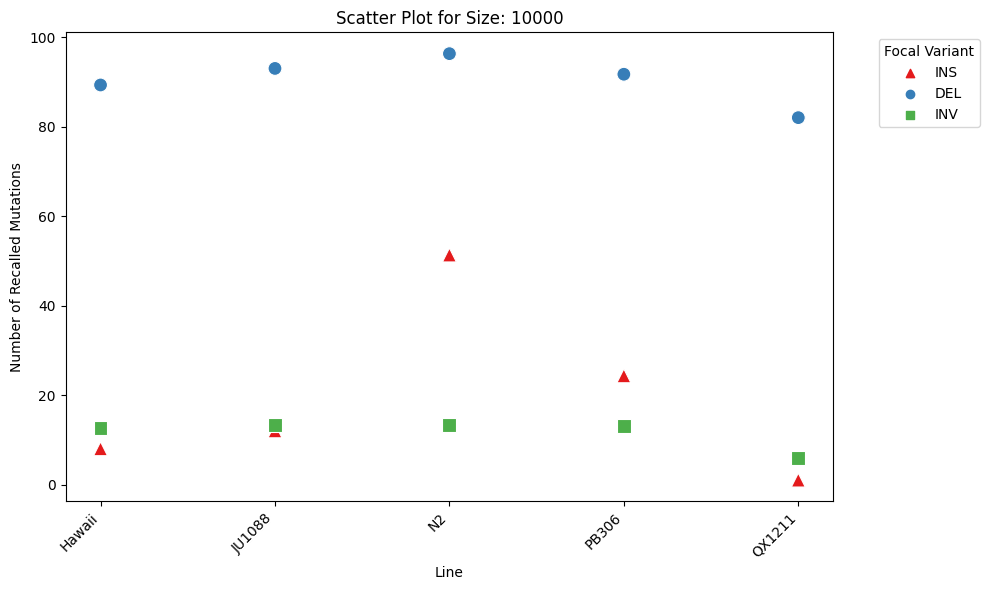

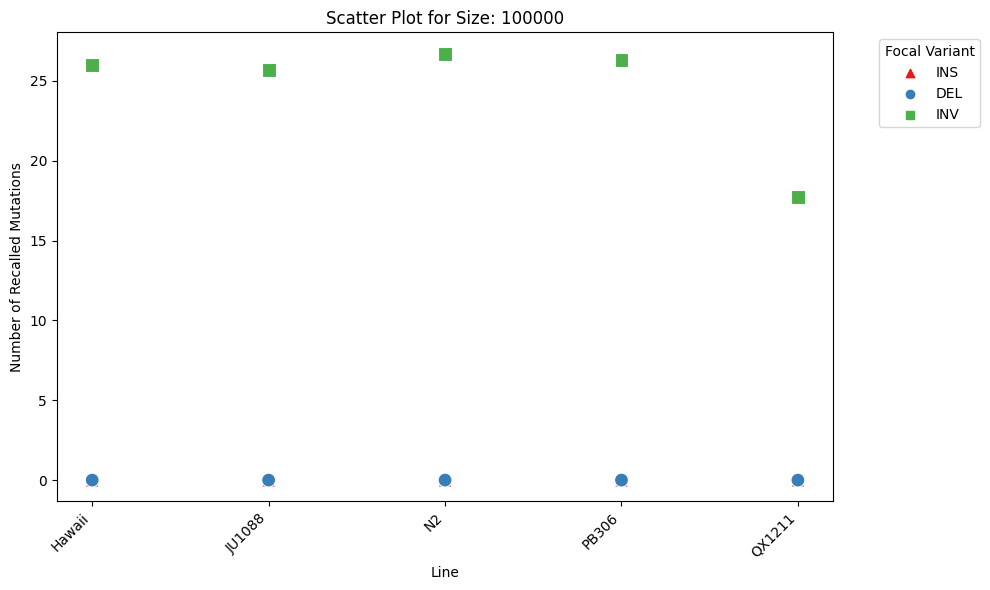

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define marker styles for each variant type
marker_styles = {'DEL': 'o', 'INS': '^', 'INV': 's'}

# Get unique sizes
sizes = melted_df['Size'].unique()

# Create separate plots for each size
for size in sizes:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=melted_df[melted_df['Size'] == size], x='Line', y='number_of_recalled_mutations', hue='Focal_Variant',
                    style='Focal_Variant', palette='Set1', markers=marker_styles, s=100, legend='full')
    plt.title(f'Scatter Plot for Size: {size}')
    plt.xlabel('Line')
    plt.ylabel('Number of Recalled Mutations')
    plt.legend(title='Focal Variant', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
